# Analysis of crime in Phoenix, AZ

Definition of crimes:

* __Larceny__: is the trespassory taking (caption) and carrying away (asportation, removal) of the tangible personal property of another with the intent to deprive him or her of its possession permanently.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./data/cleaneddataset.csv')
print (df['crime'].unique())
df.head(10)

['MOTOR VEHICLE THEFT' 'DRUG OFFENSE' 'LARCENY-THEFT' 'RAPE' 'BURGLARY'
 'AGGRAVATED ASSAULT' 'MURDER AND NON-NEGLIGENT MANSLAUGHTER' 'ROBBERY'
 'ARSON']


,date,year,month,day,weekday,hour,zip,crime,place
0,11/01/2015 00:00,2015,11,1,Sunday,00:00:00,85307,MOTOR VEHICLE THEFT,SINGLE FAMILY HOUSE
1,11/01/2015 00:00,2015,11,1,Sunday,00:00:00,85031,DRUG OFFENSE,APARTMENT
2,11/01/2015 00:00,2015,11,1,Sunday,00:00:00,85014,LARCENY-THEFT,PARKING LOT
3,11/01/2015 00:00,2015,11,1,Sunday,00:00:00,85043,MOTOR VEHICLE THEFT,SINGLE FAMILY HOUSE
4,11/01/2015 00:00,2015,11,1,Sunday,00:00:00,85006,RAPE,SINGLE FAMILY HOUSE
5,11/01/2015 00:00,2015,11,1,Sunday,00:00:00,85017,LARCENY-THEFT,PARKING LOT
6,11/01/2015 00:00,2015,11,1,Sunday,00:00:00,85014,LARCENY-THEFT,APARTMENT
7,11/01/2015 00:00,2015,11,1,Sunday,00:00:00,85029,MOTOR VEHICLE THEFT,SINGLE FAMILY HOUSE
8,11/01/2015 00:01,2015,11,1,Sunday,00:01:00,85028,LARCENY-THEFT,SINGLE FAMILY HOUSE
9,11/01/2015 00:01,2015,11,1,Sunday,00:01:00,85027,LARCENY-THEFT,SINGLE FAMILY HOUSE


In [92]:
crimemap = {
    'MOTOR VEHICLE THEFT': 'VEHICLE THEFT',
    'LARCENY-THEFT': 'LARCENY THEFT',
    'MURDER AND NON-NEGLIGENT MANSLAUGHTER' : 'MURDER',
    'AGGRAVATED ASSAULT': 'ASSAULT'
    }

df['crime'].replace(crimemap, inplace=True)

In [4]:
s = df.groupby(['month','year'])

In [5]:
#pd.pivot_table(s.size(),index=['month','year'])

## Less safe zipcodes

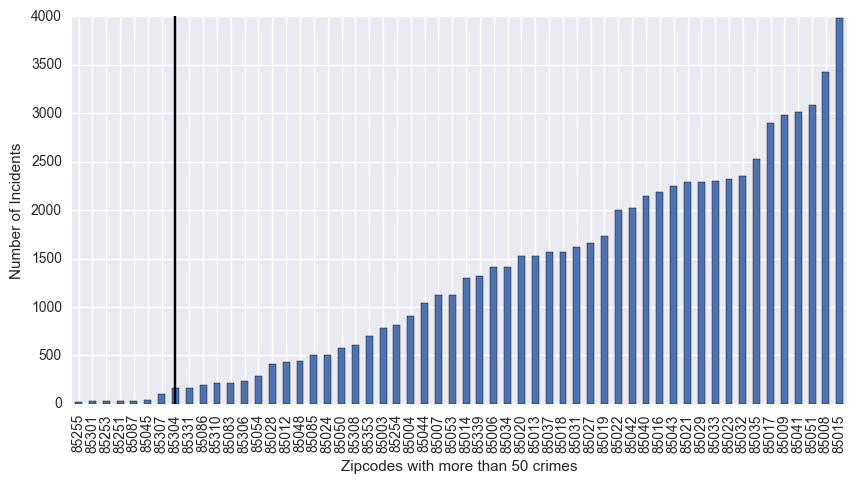

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55]


In [101]:
cutoff = 10
plt.figure(figsize=(10,5))
sd = df['zip'].value_counts(sort=True,ascending=True)
sd = sd[~(sd<cutoff)]
ax = sd.plot.bar()
ax.axvline(7, color='k', linestyle='-')
ax.set_ylabel('Number of Incidents')
ax.set_xlabel('Zipcodes with more than 50 crimes')
plt.show()
print (ax.get_get)

## Crime

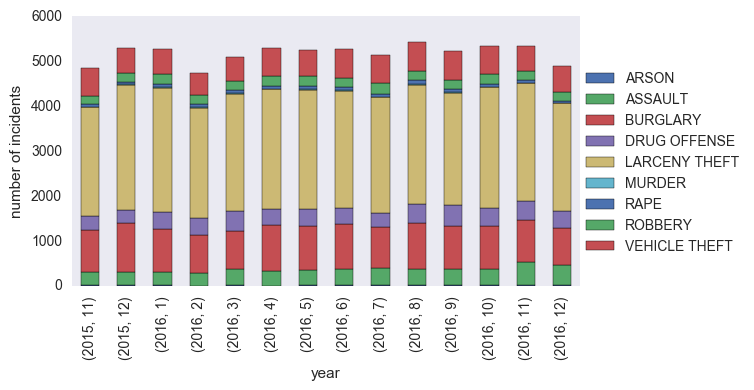

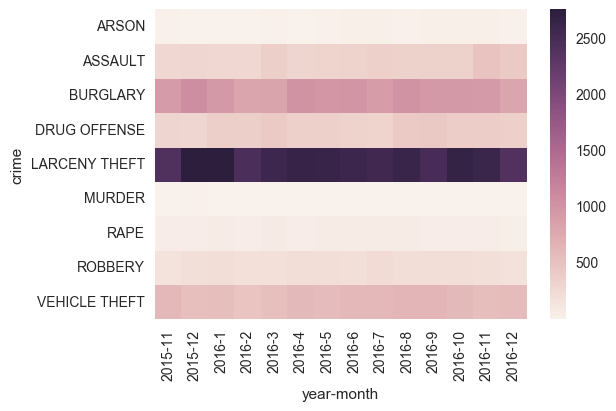

In [7]:
crime_year = pd.crosstab([df['year'],df['month']],df['crime'])
ax = crime_year.plot(kind='bar', stacked=True, grid=False)
ax.set_ylabel("number of incidents")
ax.set_xlabel("year")
ax.legend(loc = (1,0.1))
ax.set_ylim(0,6000)
plt.tight_layout()
plt.show()

sns.heatmap(crime_year.T)
plt.show()

In [8]:
df.time = pd.to_datetime(df['date'], format='%m/%d/%Y %H:%M')

In [9]:
df.head(5)

,date,year,month,day,weekday,hour,zip,crime,place
0,11/01/2015 00:00,2015,11,1,Sunday,00:00:00,85307,VEHICLE THEFT,SINGLE FAMILY HOUSE
1,11/01/2015 00:00,2015,11,1,Sunday,00:00:00,85031,DRUG OFFENSE,APARTMENT
2,11/01/2015 00:00,2015,11,1,Sunday,00:00:00,85014,LARCENY THEFT,PARKING LOT
3,11/01/2015 00:00,2015,11,1,Sunday,00:00:00,85043,VEHICLE THEFT,SINGLE FAMILY HOUSE
4,11/01/2015 00:00,2015,11,1,Sunday,00:00:00,85006,RAPE,SINGLE FAMILY HOUSE


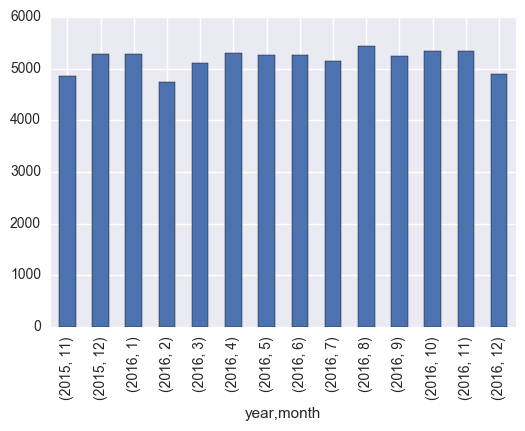

In [10]:
df.groupby(['year','month'])['crime'].count().plot(kind='bar')
plt.show()

## Weekly trends

To see weekly trends

| Crime | Highest | Lowest |
| --- | --- | --- |
| ARSON | Saturday (59) | Tuesday (27) |
| ASSAULT | Sunday (801) | Wednesday (636) |
| BURGLARY | Friday (2274) | Sunday (1383) |
| DRUG OFFENSE | Wednesday (1029) | Sunday (411) |
| LARCENY THEFT | Friday (5424) | Sunday (4655) |
| MURDER | Sunday (28) | Wednesday (15) |
| RAPE | Saturday (155) | Thursday (118) |
| ROBBERY | Wednesday (465) | Thursday (394) |
| VEHICLE THEFT | Friday (1221) | Thursday (1115) |

### Heatmap

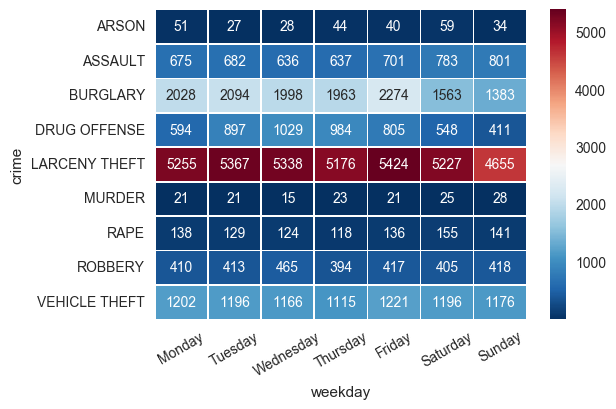

In [11]:
crime_weekday = pd.crosstab(df['weekday'],df['crime'])
daysOfWeekList = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crime_weekday=crime_weekday.reindex(daysOfWeekList)
ax=sns.heatmap(crime_weekday.T,annot=True, fmt="d",linewidths=0.5,cmap='RdBu_r')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

# Weekly trend

| Crime | Highest | Lowest |
| --- | --- | --- |
| ARSON | Saturday (59) | Tuesday (27) |
| ASSAULT | Sunday (801) | Wednesday (636) |
| BURGLARY | Friday (2274) | Sunday (1383) |
| DRUG OFFENSE | Wednesday (1029) | Sunday (411) |
| LARCENY THEFT | Friday (5424) | Sunday (4655) |
| MURDER | Sunday (28) | Wednesday (15) |
| RAPE | Saturday (155) | Thursday (118) |
| ROBBERY | Wednesday (465) | Thursday (394) |
| VEHICLE THEFT | Friday (1221) | Thursday (1115) |


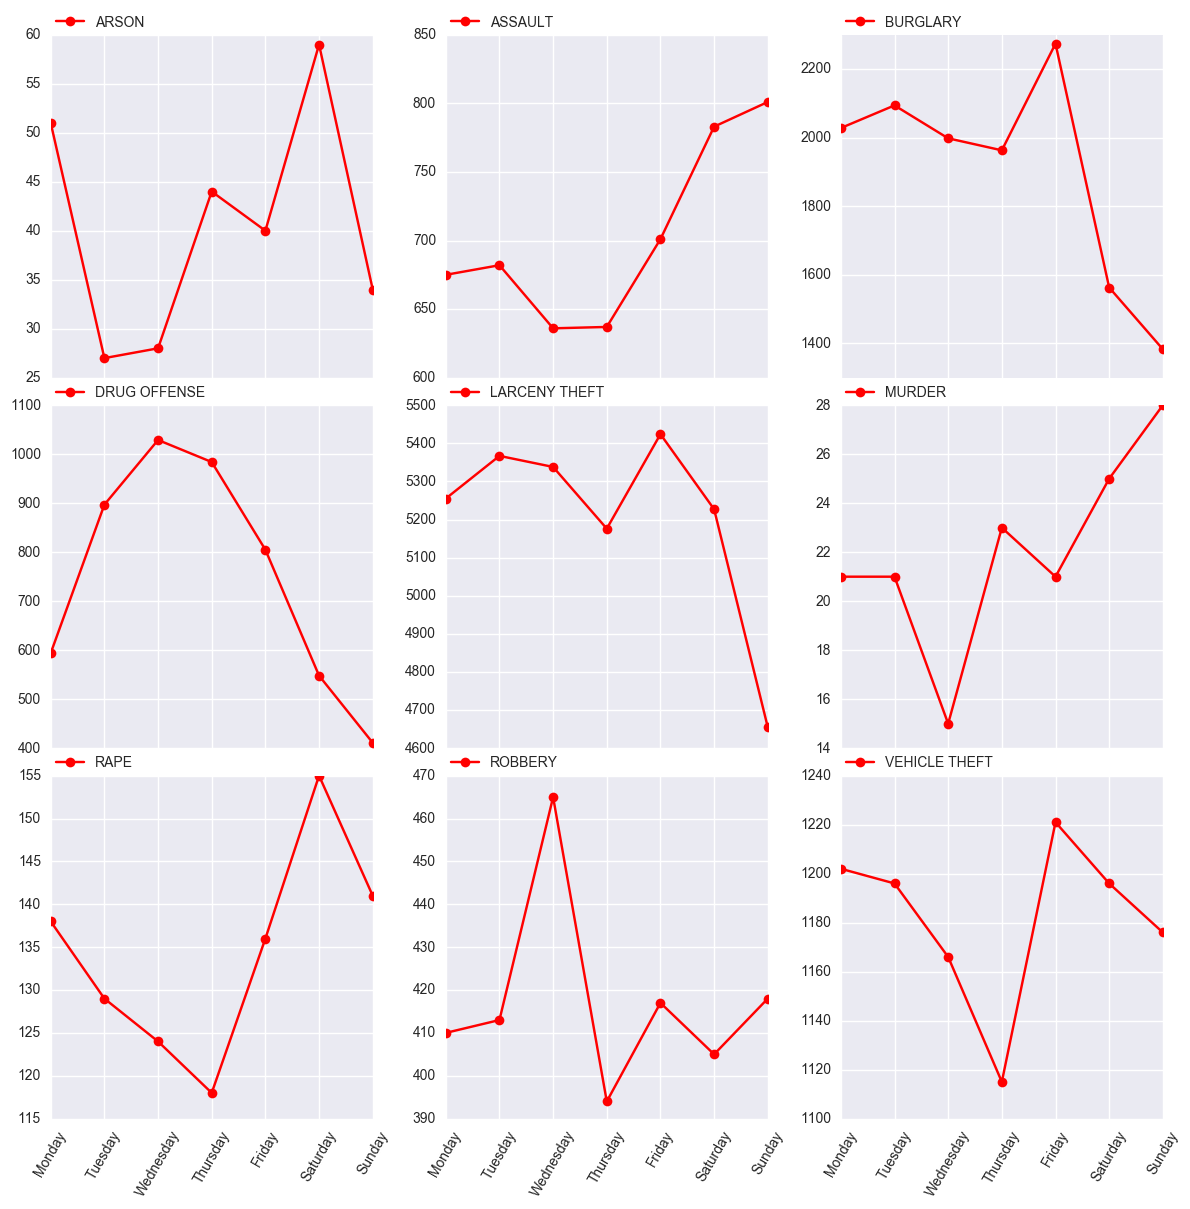

In [91]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(12,12),sharex=True)

print ('| Crime | Highest | Lowest |')
print ('| --- | --- | --- |')
k=0
for i in range(0,3):
    for j in range(0,3):
        ax = axes[i,j]
        # selec kth columns
        crime_weakday_col = crime_weekday.ix[:,k]
        
        crime_name = crime_weakday_col.name
        crime_max_label,crime_max_val = crime_weakday_col.idxmax(), crime_weakday_col.max()
        crime_min_label,crime_min_val = crime_weakday_col.idxmin(), crime_weakday_col.min()
        print ('| {} | {} ({}) | {} ({}) |'.format(crime_name,crime_max_label,crime_max_val,crime_min_label,crime_min_val))
        
        crime_weakday_col.plot(kind='line',ax=ax,color='r',marker='o')
        ax.legend(loc = (0,1))
        ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
        ax.set_xlabel('')
        k+=1
plt.tight_layout()
plt.show(fig)